In [218]:
import sys, os
from os.path import split, join
base_dir = split(os.getcwd())[0]
if base_dir not in sys.path:
    sys.path.append(base_dir)
from os.path import join
import pandas as pd
from utilities import utils
from stats_tools import vis as svis
import numpy as np
import pickle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime as dt
import datetime
#%matplotlib inline
#plt.style.use('ggplot')
importlib.reload(svis)
plt.style.use(join(base_dir,'utilities', 'plot_style.txt'))
import importlib

import matplotlib.dates as mdates
from pylab import cm
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
#mpl.rcParams['font.family'] = 'Arial'
"""
params = {'figure.dpi':350,
        'legend.fontsize': 18,#
        'figure.figsize': [6.4, 4.8],
         'axes.labelsize': 20,
         'axes.titlesize':20,
         'xtick.labelsize':20,
         'ytick.labelsize':20,
         'axes.facecolor':'white'}
mpl.rcParams.update(params) 
"""
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] 

## AcquisitionContrast Column can be dropped

In [2]:
fig_dir = join(base_dir, 'figs')
table_dir = join(base_dir, 'data/tables')
# dfc = utils.load_scan_csv(join(table_dir, 'scan_tables','scan_after_sq_pred_dst.csv'))
with open(join(table_dir, 'scan_tables','scan_after_sq_pred_dst_nos_date.pkl'), 'rb') as f:
    dfc = pickle.load(f)

In [3]:
dfc['positive_scan'] = 0
dfc.loc[dfc.days_since_test>=-3, 'positive_scan'] = 1

## Drop missing dates from 2020

In [4]:
dfcc = dfc[(dfc['2019']==1)|(~dfc.InstanceCreationDate.isna())]

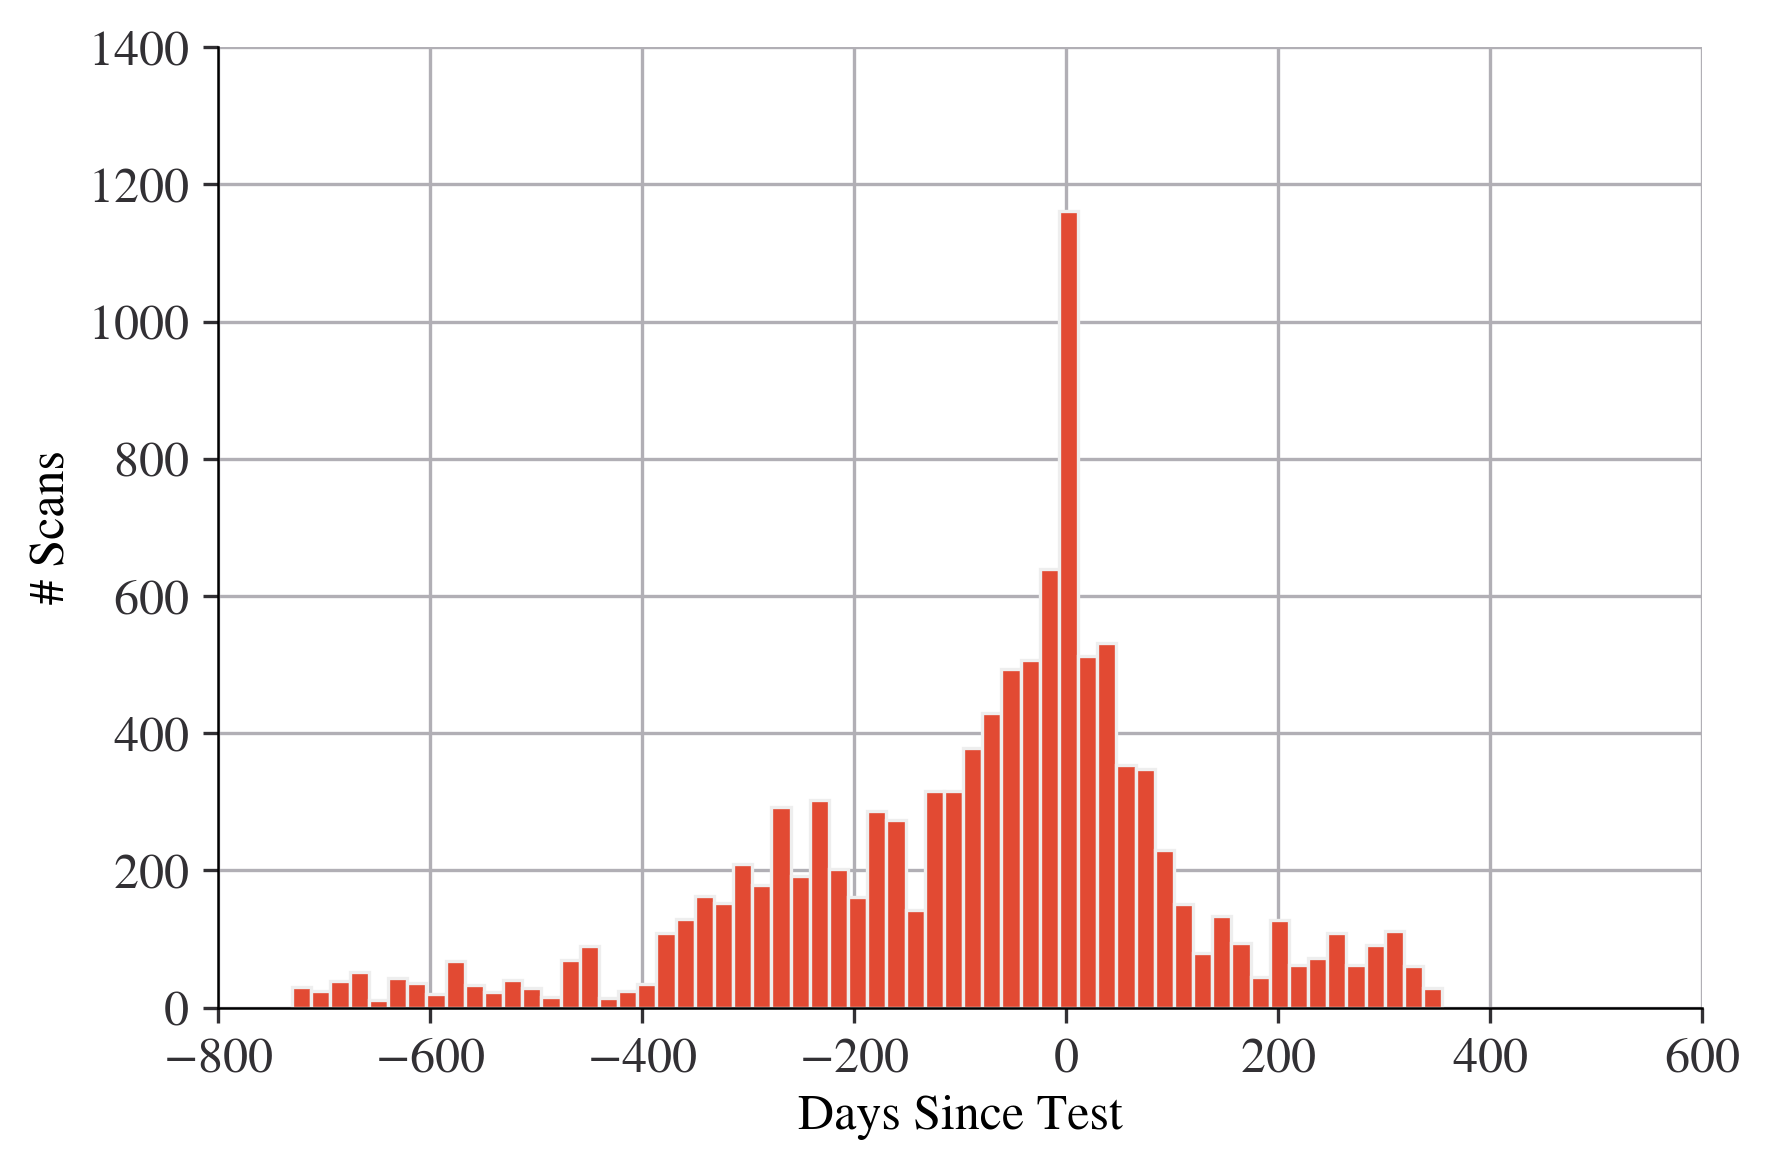

In [215]:
fig,ax = plt.subplots()
dfc.days_since_test.hist(ax=ax, bins=60)
ax.set_xlabel('Days Since Test')
ax.set_ylabel('# Scans')
fig.tight_layout()
fig.savefig(join(fig_dir, 'basic_stats','days_since_test.png'),dpi=300)

## Number of positive and negative patients by modality

Text(-0.1, 24381, '24081')

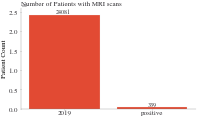

In [177]:
plt.rcParams["figure.dpi"] = 20
labels = ['2019', 'positive']
pos_mask = dfc.Positive==1
pos_pat_count = dfc['PatientID'][pos_mask].nunique()
neg_pat_count = dfc['PatientID'][~pos_mask].nunique()
counts = np.array([neg_pat_count, pos_pat_count])
kwargs={'xlabel':'', 'show':False, 'yrange':(0,26000),
        'ylabel':'Patient Count', 'title':'Number of Patients with MRI scans'}
fig, ax = svis.bar(labels, counts, kwargs=kwargs)
ax.text(1-.05, pos_pat_count+300, pos_pat_count, fontsize=22)
ax.text(0-.1, neg_pat_count+300, neg_pat_count, fontsize=22)

# Acquisition date

## For each volume

In [24]:
dft = dfcc[dfcc.InstanceCreationDate!=dt(2018,1,1)]
dftp = dft[dft.positive_scan==1]
dftn = dft[dft.positive_scan==0]
dftp['InstanceCreationDate'] = dftp['InstanceCreationDate'].apply(
    lambda x: dt(int(x.year), int(x.month), 1))
dftn['InstanceCreationDate'] = dftn['InstanceCreationDate'].apply(
    lambda x: dt(int(x.year), int(x.month), 1))

C:\Users\kiril\.conda\envs\cobra\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\kiril\.conda\envs\cobra\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [25]:
dftp = pd.DataFrame(dftp.groupby(['InstanceCreationDate']).SeriesInstanceUID.size())
dftn = pd.DataFrame(dftn.groupby(['InstanceCreationDate']).SeriesInstanceUID.size())
dftp.head()

,SeriesInstanceUID
InstanceCreationDate,
2020-03-01,36
2020-04-01,188
2020-05-01,237
2020-06-01,332
2020-07-01,126


In [26]:
dftp = dftp[(dftp.index>=dt(2018,11,1))&\
     (dftp.index<=dt(2021,4,16))]#.set_index('InstanceCreationDate')
dftn = dftn[(dftn.index>=dt(2018,11,1))&\
     (dftn.index<=dt(2021,4,16))]#.set_index('InstanceCreationDate')

In [27]:
dftp2 = dftp[(dftp.index>=dt(2020,1,1))&\
     (dftp.index<=dt(2021,4,16))]#.set_index('InstanceCreationDate')
dftn2 = dftn[(dftn.index>=dt(2020,1,1))&\
     (dftn.index<=dt(2021,4,16))]#.set_index('InstanceCreationDate')

C:\Users\kiril\.conda\envs\cobra\lib\site-packages\ipykernel_launcher.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


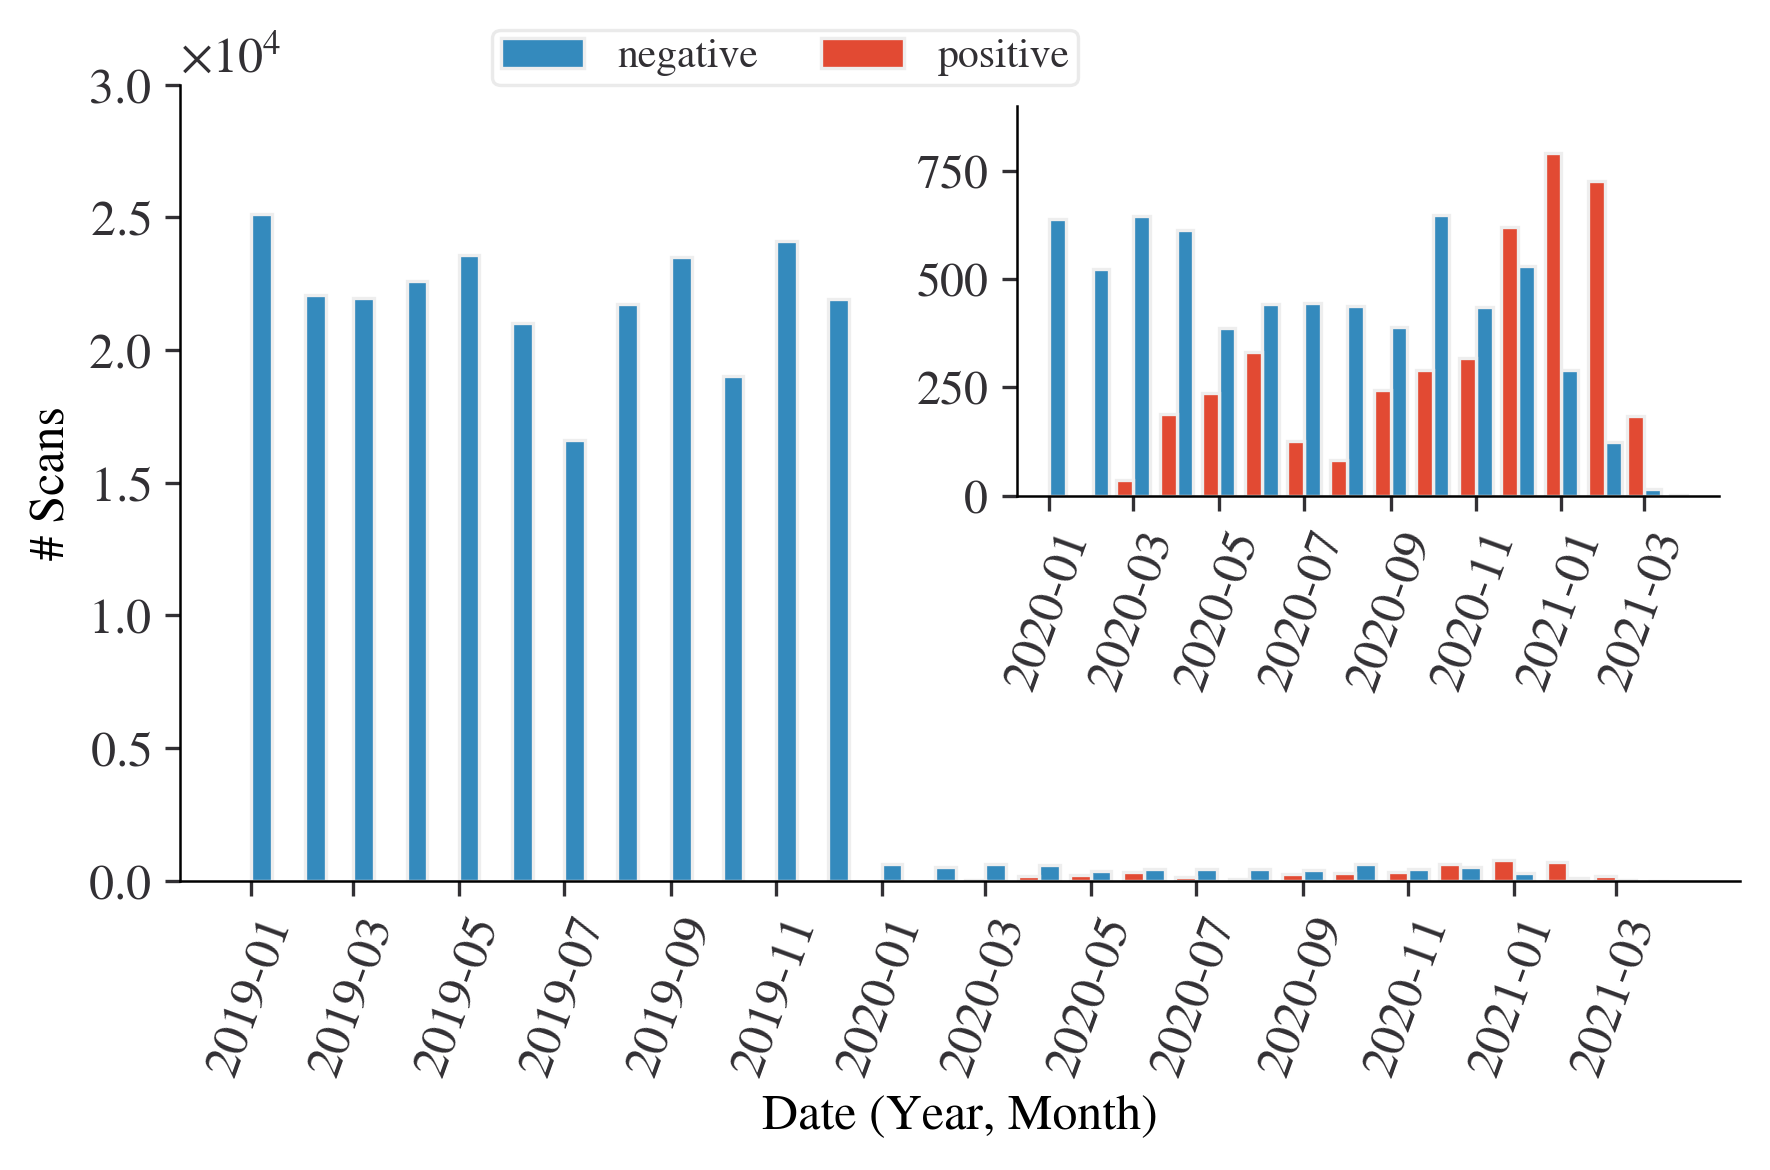

In [217]:
fig, ax = plt.subplots()

ax.bar(dftn.index+datetime.timedelta(6), dftn.SeriesInstanceUID, 
    width=12, color=colors[1],label='negative')
ax.bar(dftp.index-datetime.timedelta(6), dftp.SeriesInstanceUID, width=12, color=colors[0],
    label='positive')
axins = inset_axes(ax,
                    width="45%", # width = 30% of parent_bbox
                    height=1.3, # height : 1 inch
                    loc=1)
                              
axins.bar(dftn2.index+datetime.timedelta(6), dftn2.SeriesInstanceUID, width=12, color=colors[1], )
axins.bar(dftp2.index-datetime.timedelta(6), dftp2.SeriesInstanceUID, width=12, color=colors[0],)

axins.xaxis.set_major_locator(mdates.MonthLocator())
axins.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axins.tick_params(axis='x', which='major',  rotation=70,)
axins.tick_params(axis='y', which='major', labelsize=11.5,)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.tick_params(axis='x', which='major',  rotation=70)
ax.tick_params(axis='y', which='major', )
x_ticks = axins.get_xticks()
_ = axins.set_xticks(x_ticks[::2])

x_ticks = ax.get_xticks()
_ = ax.set_xticks(x_ticks[1:-2:2])
ax.set_ylabel('# Scans', )
ax.set_xlabel('Date (Year, Month)', )
ax.legend(ncol=2, loc=(.2,1), )
fig.tight_layout()
fig.savefig(join(fig_dir, 'basic_stats','ac_date_pos_neg.png'),dpi=350)

# Studies

In [60]:
df_studies = pd.read_csv(f"{table_dir}/studies_clean.csv", 
    converters={'DateTimeStart':utils.date_time_converter})
dftps = df_studies[df_studies.Positive==1]
dftns = df_studies[df_studies.Positive==0] 

In [250]:
df_studies[df_studies.Positive.isna()]

,PatientID,StudyNum,DateTimeStart,Positive,NumVolumes
5,001110dc40c217c554ee0700a64cef9f,1,2019-05-10 18:20:00,NaN,1
13,0022a80a7733dfbf1155577de6221c0e,1,2019-08-23 13:27:00,NaN,1
20,002f248fa690287f32b53ddbefef6aa8,1,2019-04-12 12:12:00,NaN,8
23,0031b08e7ed9e6631e5d3ee1b0a46e6d,1,2020-02-23 09:25:00,NaN,2
27,003e8dbee71b67681fe72abe758cb695,1,2020-07-01 13:46:00,NaN,14
...,...,...,...,...,...
31077,ffd514e79bbcbe3b7e3ab98ed44eec4d,1,2019-07-09 13:53:00,NaN,1
31080,ffd724f7fe33ece45c3a4d74cc344b8b,1,2019-10-10 14:22:00,NaN,12
31082,ffd9346b3e07aa63765c7c02facdc6e1,1,2019-07-10 13:57:00,NaN,1
31085,ffe102bcd9e270fdd5d66a5b648b4e97,1,2019-12-20 13:26:00,NaN,2


### Number of scans per study

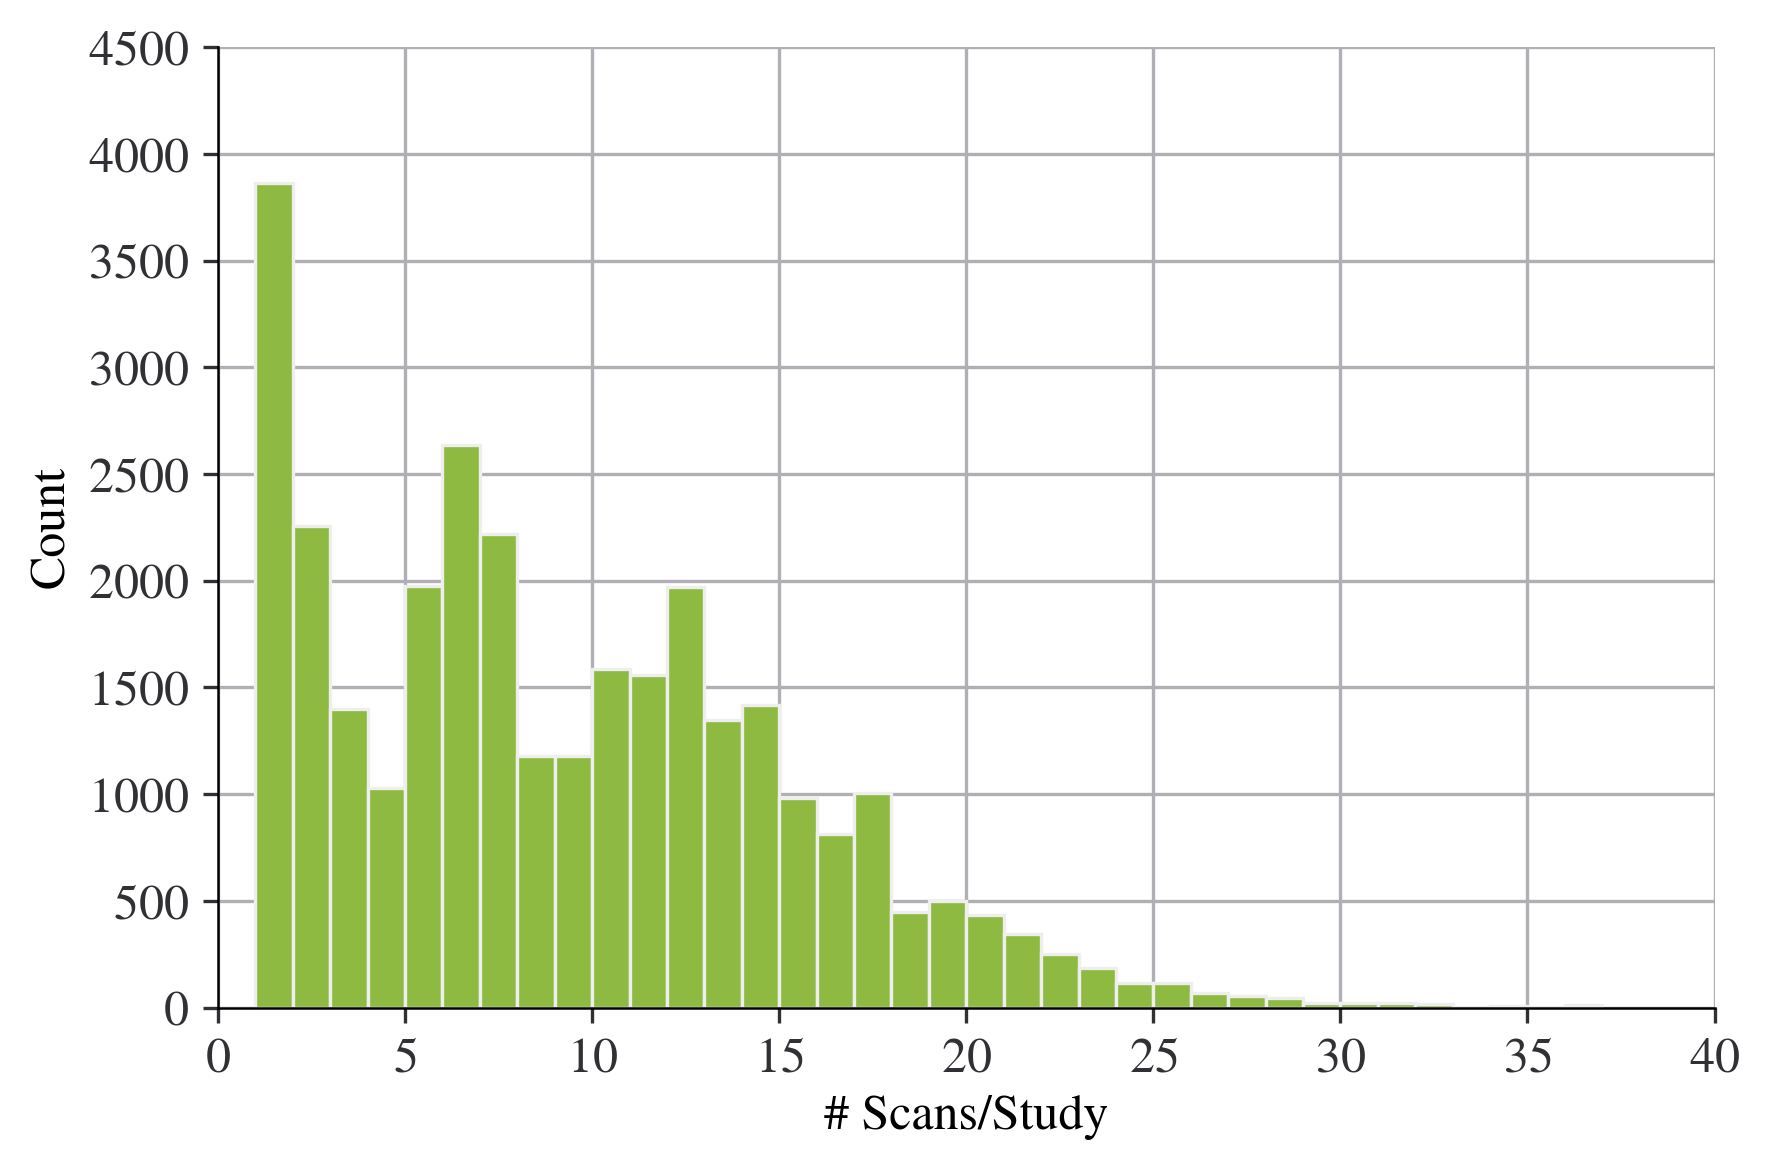

In [235]:
fig,ax = plt.subplots()
# dftns.NumVolumes.hist(bins=np.arange(0,38), color=colors[1], ax=ax)
# dftps.NumVolumes.hist(bins=np.arange(0,38), color=colors[0], ax=ax)
df_studies.NumVolumes.hist(bins=np.arange(0,38), color=colors[5], ax=ax)
ax.set_xlim(0,40)       
ax.set_xlabel('# Scans/Study')
ax.set_ylabel('Count')
fig.tight_layout()
fig.savefig(join(fig_dir, 'basic_stats','num_volumes_per_study.png'),dpi=350)

In [70]:
dftps['DateTimeStart'] = dftps['DateTimeStart'].apply(
    lambda x: dt(int(x.year), int(x.month), 1))
dftns['DateTimeStart'] = dftns['DateTimeStart'].apply(
    lambda x: dt(int(x.year), int(x.month), 1))

C:\Users\kiril\.conda\envs\cobra\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kiril\.conda\envs\cobra\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [74]:
dftns = dftns[dftns.DateTimeStart!=dt(2018,1,1)]

In [83]:
dftps1 = pd.DataFrame(dftps.groupby(['DateTimeStart']).count())
dftns1 = pd.DataFrame(dftns.groupby(['DateTimeStart']).count())

dftps2 = dftps1[(dftps1.index>=dt(2020,1,1))&\
     (dftps1.index<=dt(2021,4,16))]#.set_index('InstanceCreationDate')
dftns2 = dftns1[(dftns1.index>=dt(2020,1,1))&\
     (dftns1.index<=dt(2021,4,16))]#.set_index('InstanceCreationDate')

## Studies over time

C:\Users\kiril\.conda\envs\cobra\lib\site-packages\ipykernel_launcher.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


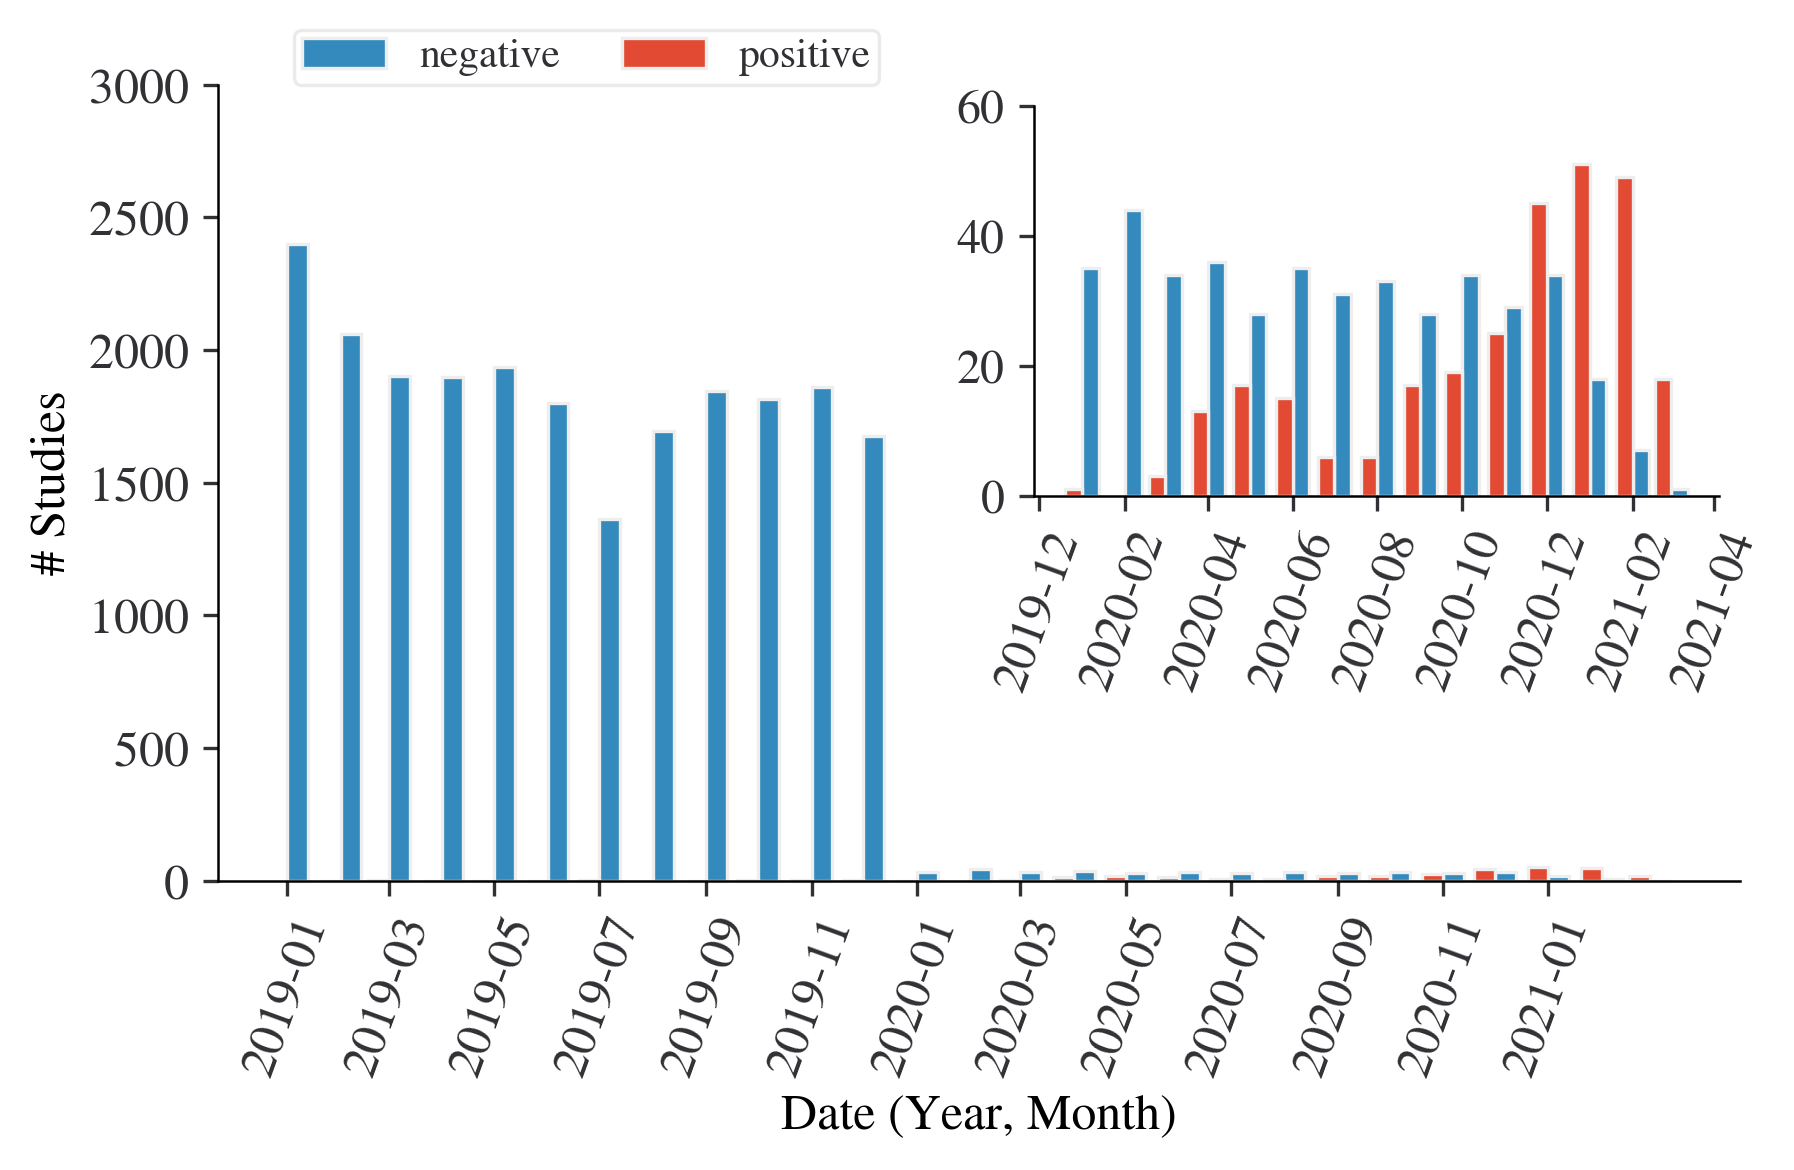

In [236]:
fig, ax = plt.subplots()
plt.rcParams["figure.dpi"] = 200
ax.bar(dftns1.index+datetime.timedelta(6), dftns1.PatientID, 
    width=12, color=colors[1],label='negative')
ax.bar(dftps1.index-datetime.timedelta(6), dftps1.PatientID, width=12, color=colors[0],
    label='positive')
axins = inset_axes(ax,
                    width="45%", # width = 30% of parent_bbox
                    height=1.3, # height : 1 inch
                    loc=1)
                              
axins.bar(dftns2.index+datetime.timedelta(6), dftns2.PatientID, width=12, color=colors[1], )
axins.bar(dftps2.index-datetime.timedelta(6), dftps2.PatientID, width=12, color=colors[0],)

axins.xaxis.set_major_locator(mdates.MonthLocator())
axins.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axins.tick_params(axis='x', which='major',  rotation=70, )
axins.tick_params(axis='y', which='major', labelsize=11.5,)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.tick_params(axis='x', which='major',  rotation=70)
ax.tick_params(axis='y', which='major', )
x_ticks = axins.get_xticks()
_ = axins.set_xticks(x_ticks[::2])

x_ticks = ax.get_xticks()
_ = ax.set_xticks(x_ticks[1:-2:2])
ax.set_ylabel('# Studies', )
ax.set_xlabel('Date (Year, Month)', )
ax.legend(ncol=2, loc=(.05,1),)
fig.tight_layout()
fig.savefig(join(fig_dir, 'basic_stats','studies_date_pos_neg.png'),dpi=350)

## Studies per patients

(0.0, 10.0)

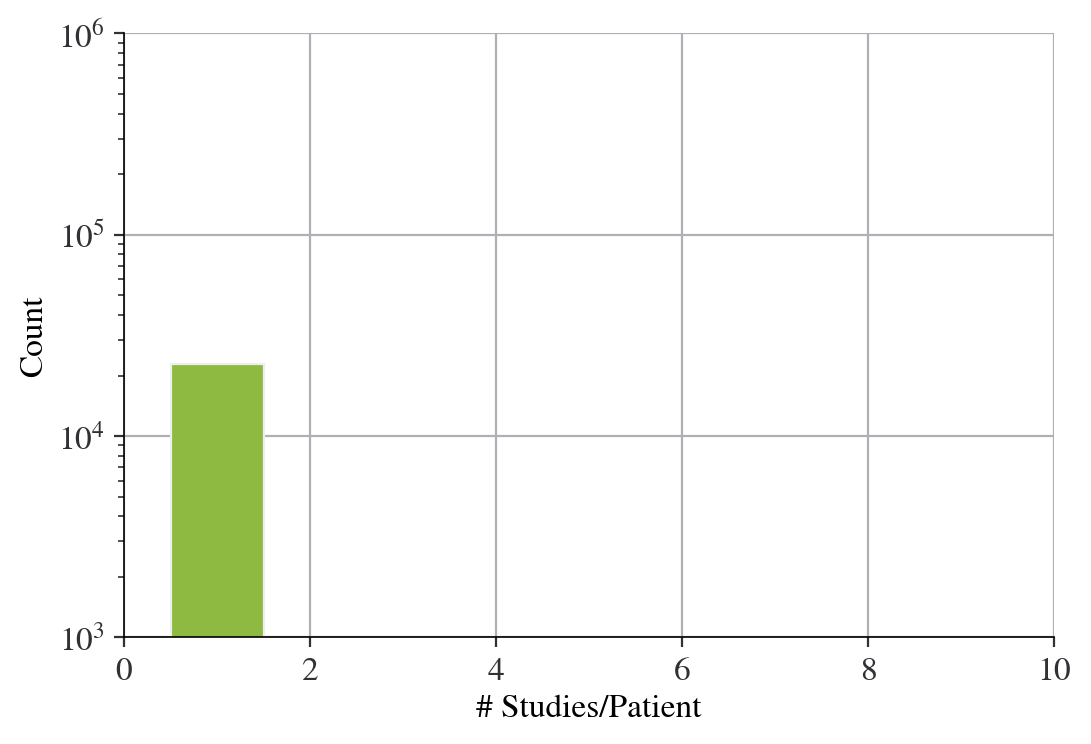

In [244]:
fig, ax = plt.subplots()
dftns.PatientID.value_counts().hist(bins=np.arange(-.5,10.5,1), ax=ax, color=colors[5])
ax.set_yscale('log')
ax.set_ylabel('Count')
ax.set_xlabel('# Studies/Patient')
ax.set_xlim(0,10)

(0.0, 10.0)

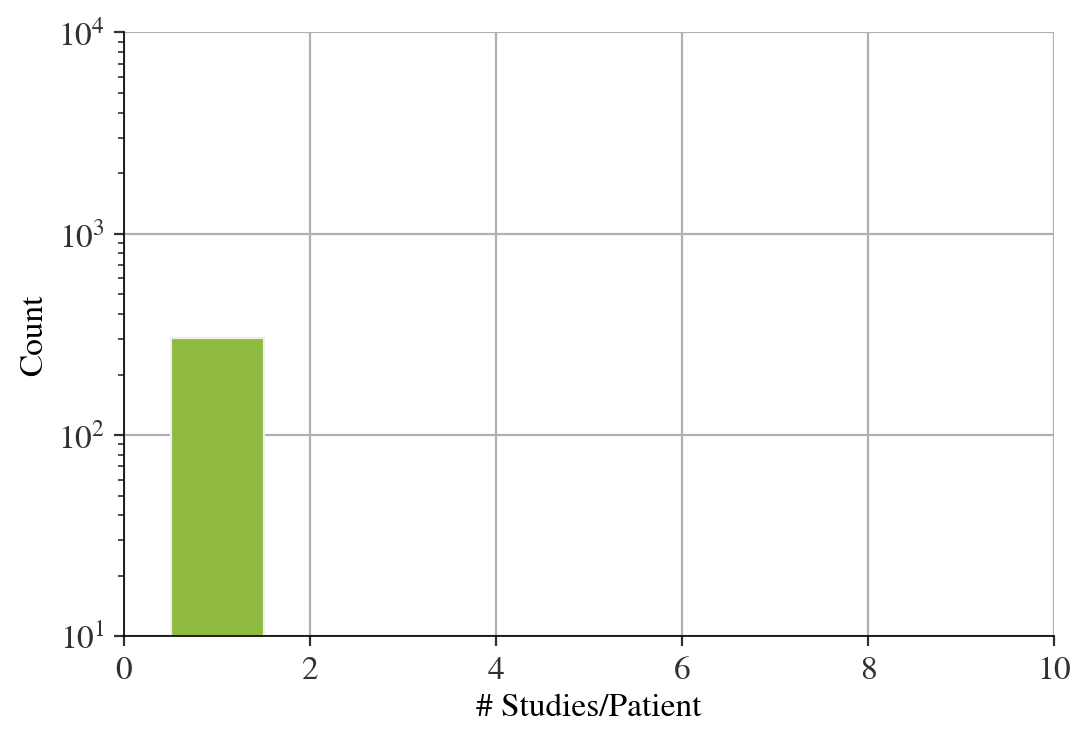

In [243]:
fig, ax = plt.subplots()
dftps.PatientID.value_counts().hist(bins=np.arange(-.5,10.5,1), ax=ax, color=colors[5])
ax.set_yscale('log')
ax.set_ylabel('Count')
ax.set_xlabel('# Studies/Patient')
ax.set_xlim(0,10)

## Scans per study